In [1]:
import utils as ut
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score,mean_squared_error
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
#Load paths
# path_VM = ../../dvm-dos-tem/mads_calibration/'
samples='sample_matrix.csv'
results='results.txt'
path_EML='EML21/'
path_MD3='MD3/'
path_MD1='MD1/'
path_TK='TK/'

In [3]:
#Load Functions

def z_score(y_short,y_long,outnames):
    '''
    NOTE: this function assumes that last row in y_long is target
    
    y_short: model dataframe restricted by R2
    y_long : full model dataframe 
    outnames : dataframe header
    '''

    zscore=[]
    for iname in outnames:
        zscore.append((y_short[iname].mean()-y_long[iname].iloc[-1])/y_short[iname].std())
    
    return zscore

In [4]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
# MAE is computed by taking the absolute difference between each target value and its corresponding 
# model output value (over all runs), and then taking the average of these absolute differences. n=num simulations
# MAE = (1 / n) * Σ|target_i - model_i|
# Calculate the mean of the absolute values of the target values.
# Mean Absolute Target Value = (1 / n) * Σ|target_i|
# NMAE = (MAE / Mean Absolute Target Value) * 100

def calculate_nmae(df_model,ymodel):
    '''    
    df_model: model dataframe
    ymodel: full dataframe constrained by error
    '''
    targets = df_model.iloc[-1, :]
    [n,m]=np.shape(ymodel)
    df=(abs(ymodel.iloc[:-1,:] - df_model.iloc[-1, :]))
    column_sums = df.sum(axis=0)
    mae = column_sums /(n-1) 
    mean_abs_target = np.abs(targets).mean()
    nmae = (mae / mean_abs_target) * 100
    return nmae

In [5]:
def site_metric_matrix(metric_matrix, metric):
    '''    
    metric_matrix: matrix (dataframe) of metric to plot. cols = sites, rows = targets
    metric: string of the name of the metric, ex; 'NMAE'
    '''
    #if metric=='Zscore':
        
    n_rows, n_cols = metric_matrix.shape
    fig, ax = plt.subplots(figsize=(n_cols, n_rows))
    sns.heatmap(metric_matrix, cmap="coolwarm", annot=True, fmt=".2f")
    ax.set_xlabel('Sites')
    ax.set_ylabel('Targets')
    ax.set_title(metric + ' Matrix')
    plt.show()
    return

# cmax -> GPP

In [6]:
# Load EML21
sa_folder='sa_cmax_EML21_090_AK/'
df_param = pd.read_csv(path_EML+sa_folder+samples)
df_model = pd.read_csv(path_EML+sa_folder+results,header=None)

output_name = ['GPP0','GPP1','GPP2','GPP3','GPP4','GPP5','GPP6','NA','NA']
df_model.columns = output_name
units = 'gC/m2/year'

xparams, ymodel =  ut.get_params_r2_rmse(df_param,df_model,r2lim=0.97)

In [19]:
# Load MD3
sa_folder = 'sa_cmax_MD3_050_AK/'
df_param_MD3 = pd.read_csv(path_MD3+sa_folder+samples)
df_model_MD3 = pd.read_csv(path_MD3+sa_folder+results,header=None)

output_name_MD3 = ['GPP0','GPP1','GPP2','GPP3']
df_model_MD3.columns = output_name_MD3

xparams_MD3, ymodel_MD3 =  ut.get_params_r2_rmse(df_param_MD3,df_model_MD3,r2lim=0.97)

In [32]:
# Load MD1
sa_folder = 'SA-MD1-STEP1/'
print(path_MD1+sa_folder+samples)
df_param_MD1 = pd.read_csv(path_MD1+sa_folder+samples)
df_model_MD1 = pd.read_csv(path_MD1+sa_folder+results,header=None)

output_name_MD1 = ['GPP0','GPP1','GPP2','GPP3']
df_model_MD1.columns = output_name_MD1
xparams_MD1, ymodel_MD1 =  ut.get_params_r2_rmse(df_param_MD1,df_model_MD1,r2lim=0.97)

MD1/SA-MD1-STEP1/sample_matrix.csv


In [30]:
# Load MD1
sa_folder = 'sa-cmax-TK-075-EJ/'
print(path_TK+sa_folder+samples)
df_param_TK = pd.read_csv(path_TK+sa_folder+samples)
df_model_TK = pd.read_csv(path_TK+sa_folder+'results.csv',header=None)

output_name_TK = ['GPP0','GPP1','GPP2','GPP3','GPP4','GPP5','GPP6','GPP7']
df_model_TK.columns = output_name_TK
xparams_TK, ymodel_TK =  ut.get_params_r2_rmse(df_param_TK,df_model_TK,r2lim=0.97)

TK/sa-cmax-TK-075-EJ/sample_matrix.csv


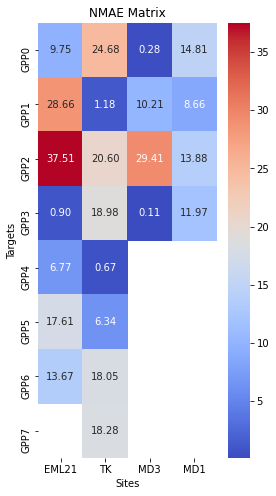

In [35]:
nmae = calculate_nmae(df_model,ymodel)

nmae_tk = calculate_nmae(df_model_TK,ymodel_TK)

nmae_3 = calculate_nmae(df_model_MD3,ymodel_MD3)

nmae_md1 = calculate_nmae(df_model_MD1,ymodel_MD1)

nmae_matrix = pd.DataFrame({'EML21': nmae[:7], 'TK': nmae_tk, 'MD3': nmae_3, 'MD1': nmae_md1})

#site_metric_matrix(nmae_matrix.iloc[:8,:], 'NMAE')
site_metric_matrix(nmae_matrix, 'NMAE')

# nmax+krb -> NPP+VEGC

In [68]:
#Load EML21
per_number=0.5
sa_folder = 'sa_nmaxkrb_EML21_090_AK/'
df_param = pd.read_csv(path_EML+sa_folder+samples)
df_model = pd.read_csv(path_EML+sa_folder+results,header=None)

output_name = ['NPP0','NPP1','NPP2','NPP3','NPP4','NPP5','NPP6',\
               'VEGC00','VEGC01','VEGC02','VEGC03','VEGC04','VEGC05','VEGC06',\
                'VEGC10','VEGC11',\
                'VEGC20','VEGC21','VEGC22','VEGC23']
df_model.columns = output_name
units_NPP = 'gC/m2/year'
units_VEGC = 'gC/m2'

xparams, ymodel =  ut.get_params_r2_rmse(df_param,df_model,r2lim=per_number)

In [58]:
#Load MD3
sa_folder = 'sa_nmaxkrb_MD3_090_AK/'
df_param_MD3 = pd.read_csv(path_MD3+sa_folder+samples)
df_model_MD3 = pd.read_csv(path_MD3+sa_folder+results,header=None)

output_name_MD3 = ['NPP0','NPP1','NPP2','NPP3',\
                'VEGC00','VEGC01','VEGC02','VEGC03','VEGC10','VEGC11','VEGC12',\
               'VEGC20','VEGC21','VEGC22']
df_model_MD3.columns = output_name_MD3

xparams_MD3, ymodel_MD3 =  ut.get_params_r2_rmse(df_param_MD3,df_model_MD3,r2lim=per_number)

In [59]:
#MD1
sa_folder = 'SA-MD1-STEP2/'
df_param_MD1 = pd.read_csv(path_MD1+sa_folder+samples)
df_model_MD1 = pd.read_csv(path_MD1+sa_folder+'results.csv',header=None)
output_name_MD1 = ['NPP0','NPP1','NPP2','NPP3',\
                'VEGC00','VEGC01','VEGC02','VEGC03','VEGC10','VEGC11','VEGC12',\
               'VEGC20','VEGC21','VEGC22']
df_model_MD1.columns = output_name_MD1

xparams_MD1, ymodel_MD1 =  ut.get_params_r2_rmse(df_param_MD1,df_model_MD1,r2lim=per_number)

In [60]:
#TK
sa_folder = 'sa-krb-NPPVEGC-TK-EJ-075/'
df_param_TK = pd.read_csv(path_TK+sa_folder+samples)
df_model_TK = pd.read_csv(path_TK+sa_folder+'results.csv',header=None)

output_name_TK = ['NPP0','NPP1','NPP2','NPP3','NPP4','NPP5','NPP6','NPP7', \
              'VEGC00','VEGC01','VEGC02','VEGC03','VEGC04','VEGC05','VEGC06','VEGC07', \
              'VEGC10','VEGC11','VEGC12', \
              'VEGC20','VEGC21','VEGC22','VEGC23','VEGC24']

df_model_TK.columns = output_name_TK

xparams_TK, ymodel_TK =  ut.get_params_r2_rmse(df_param_TK,df_model_TK,r2lim=per_number)

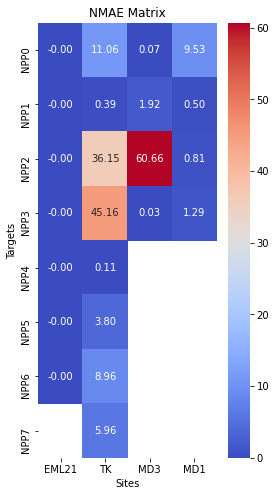

In [65]:
nmae = calculate_nmae(df_model,ymodel)
nmae_tk = calculate_nmae(df_model_TK,ymodel_TK)
nmae_3 = calculate_nmae(df_model_MD3,ymodel_MD3)
nmae_md1 = calculate_nmae(df_model_MD1,ymodel_MD1)
nmae_matrix = pd.DataFrame({'EML21': nmae, 'TK': nmae_tk, 'MD3': nmae_3, 'MD1': nmae_md1})

site_metric_matrix(nmae_matrix.iloc[:8,:], 'NMAE')


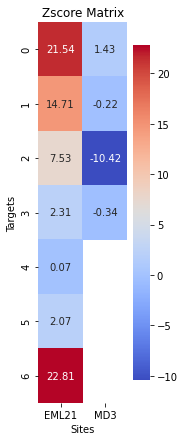

In [72]:
z=z_score(ymodel,df_model,output_name)
z = pd.Series(z, dtype=float)
z_3=z_score(ymodel_MD3,df_model_MD3,output_name_MD3)
z_3 = pd.Series(z_3, dtype=float)
#z_matrix= pd.DataFrame({'EML21': z3, 'TK': nmae_tk, 'MD3': nmae_3, 'MD1': nmae_md1})

z_matrix = pd.DataFrame({'EML21': z[:7], 'MD3': z_3[:4]})
site_metric_matrix(z_matrix.iloc[:8,:], 'Zscore')